# One Class SVM

Resource: https://github.com/celiacintas/OOD_hackathon/blob/main/day1/Intro_to_ML.ipynb

# Data preparation

ISIC for the training:

In [ ]:
import pandas as pd

groundtruth = pd.read_csv("../Datasets/ISIC2019/ISIC_2019_Training_GroundTruth.csv")
groundtruth = groundtruth.set_index("image")
indist = list(groundtruth.index)

In [ ]:
import os
from pathlib import Path
import numpy as np
from PIL import Image


X_data = []


#ood_data_darker = []
#ood_data_lighter = []
#ood_data = []

folder_dir = "../Datasets/ISIC2019/ISIC_2019_Training_Input"
images = Path(folder_dir).glob("*.jpg")
count = 0
for i in list(images)[:10000]:#10000
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    if i.stem in indist:
        X_data.append(img_resize)
        count += 1
    # elif i.stem in oodist:
    # ood_data.append(img_resize)

In [ ]:
print("Count of inliers:",len(X_data))

Count of inliers: 10000


Fitz17k for the testing:

In [ ]:
ood_darker = []
ood_lighter = []
ood_data = []
darker_dir = "/Datasets/dataset/fitzpatrick 17k /Darker_Only/Darker_Skin_Tones"
lighter_dir = "/Datasets/dataset/fitzpatrick 17k /Lighter_only/Lighter_Skin_Tones"
ALL_dir = "/Datasets/dataset/fitzpatrick 17k /ALL_images/All images"

# Process images from the darker directory
darker_images = Path(darker_dir).glob("*.jpg")
for i in darker_images:
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    ood_darker.append(img_resize)
    ood_data.append(img_resize)

# Process images from the lighter directory
lighter_images = Path(lighter_dir).glob("*.jpg")
for i in list(lighter_images)[:3300]:#3300
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    ood_lighter.append(img_resize)
    ood_data.append(img_resize)

In [ ]:
print("Count of OOD data:",len(ood_data))
print("Count of ood lighter:",len(ood_lighter))
print("Count of ood darker:",len(ood_darker))

Count of OOD data: 4618
Count of ood lighter: 3300
Count of ood darker: 1318


In [ ]:
ood_data = np.array(ood_data)
ood_lighter= np.array(ood_lighter)
ood_darker = np.array(ood_darker)

In [ ]:
len(X_data) , len(ood_data),len(ood_lighter) , len(ood_darker)

(10000, 4618, 3300, 1318)

In [ ]:
import numpy as np

X_array = np.array(X_data)
ood_array = np.array(ood_data)  #for all
ood_D_array = np.array(ood_darker) #for darker only
ood_L_array = np.array(ood_lighter) #for lighter only


Binary only 2 classes

In [ ]:
#Lighter category
y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
#y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
#y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_L_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(13300, 3072) (13300,)


In [ ]:
#Darker Category

y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
#y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
#y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_D_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(11318, 3072) (11318,)


In [ ]:
#ALL

y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
#y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
#y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(14618, 3072) (14618,)


Multiclasses

In [ ]:
y_ind = np.zeros(X_array.shape[0])  # not an OOD sample
y_ood= np.ones(ood_array.shape[0]) *1 # an OOD sample
y_ood_D = np.ones(ood_D_array.shape[0]) * 2  # an OOD sample (darker)
y_ood_L = np.ones(ood_L_array.shape[0]) * 3  # an OOD sample (lighter)
X = np.concatenate([X_array, ood_D_array, ood_L_array])
y = np.concatenate([y_ind, y_ood_D, y_ood_L])
print(X.shape, y.shape)

(14618, 3072) (14618,)


Fitz 17k for the training 

In [ ]:
#FST images as training data
import os
from pathlib import Path
import numpy as np
from PIL import Image

X_data_S = []# S for Swapped

folder_dir_S = "/Datasets/dataset/fitzpatrick 17k /ALL_images/All images"#S for Swapped
images = Path(folder_dir_S).glob("*.jpg")
count = 0
for i in list(images)[:10000]:#10000!
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()

    X_data_S.append(img_resize)
    count += 1

In [ ]:
print("Count of swapped inliers",len(X_data_S))

Count of swapped inliers 10000


ISIC 2019 for the testing 

In [ ]:
#ISIC 2019 as testing data
#S for Swapped

darker_dir_S = "/content/Datasets/ISIC2019/ISIC2019/Darker_Skin_Tones/Darker_Skin_Tones"
lighter_dir_S = "/content/Datasets/ISIC2019/ISIC2019/Lighter_Skin_Tones/Lighter_Skin_Tones"
ALL_dir_S = "/content/Datasets/ISIC2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input"

ood_darker_S = []
ood_lighter_S = []
ood_data_S = []


# Process images from the darker directory
darker_images = Path(darker_dir_S).glob("*.jpg")
for i in darker_images:
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    ood_darker_S.append(img_resize)
    ood_data_S.append(img_resize)

# Process images from the lighter directory
lighter_images = Path(lighter_dir_S).glob("*.jpg")
for i in list(lighter_images)[:3300]:#3300
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    ood_lighter_S.append(img_resize)
    ood_data_S.append(img_resize)

In [ ]:
ood_data_S = np.array(ood_data_S)#S for Swapped
ood_lighter_S= np.array(ood_lighter_S)
ood_darker_S = np.array(ood_darker_S)

In [ ]:
len(X_data_S) , len(ood_data_S),len(ood_lighter_S) , len(ood_darker_S)

(10000, 3304, 3300, 4)

In [ ]:
import numpy as np

X_array_S = np.array(X_data_S) #In distribution
ood_array_S = np.array(ood_data_S)  #for all
ood_D_array_S = np.array(ood_darker_S) #for darker only
ood_L_array_S = np.array(ood_lighter_S) #for lighter only


Two classes

In [ ]:
#S for Swapped
#Light only
y_ind = np.zeros(X_array_S.shape[0])  # not an OOD sample
y_ood_L= np.ones(ood_L_array_S.shape[0])   # an OOD sample (lighter)
X_S = np.concatenate([X_array_S,ood_L_array_S])
y_S = np.concatenate([y_ind, y_ood_L])
print(X.shape, y.shape)

(14618, 3072) (14618,)


In [ ]:
#S for Swapped
#Dark only
y_ind = np.zeros(X_array_S.shape[0])  # not an OOD sample
y_ood_D= np.ones(ood_D_array_S.shape[0])   # an OOD sample (lighter)
X_S = np.concatenate([X_array_S,ood_D_array_S])
y_S = np.concatenate([y_ind, y_ood_D])
print(X.shape, y.shape)

(14618, 3072) (14618,)


In [ ]:
#S for Swapped
#ALL
y_ind = np.zeros(X_array_S.shape[0])  # not an OOD sample
y_ood= np.ones(ood_array_S.shape[0])  # an OOD sample
X_S = np.concatenate([X_array_S, ood_array_S])
y_S = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(14618, 3072) (14618,)


Multiclasses

In [ ]:
#S for Swapped
y_ind = np.zeros(X_array_S.shape[0])  # not an OOD sample
y_ood= np.ones(ood_array_S.shape[0]) *1 # an OOD sample
y_ood_D = np.ones(ood_D_array_S.shape[0]) * 2 # an OOD sample (darker)
y_ood_L= np.ones(ood_L_array_S.shape[0]) * 3  # an OOD sample (lighter)
X_S = np.concatenate([X_array_S, ood_D_array_S, ood_L_array_S])
y_S = np.concatenate([y_ind, y_ood_D, y_ood_L])
print(X.shape, y.shape)

(14618, 3072) (14618,)


## PCA visualization

explained variance ratio (first two components): [0.44557194 0.12567861]


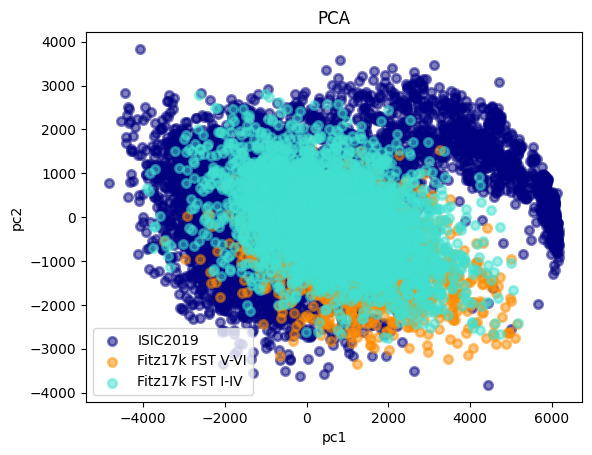

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import aux
import importlib

importlib.reload(aux)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

aux.plot_pca(X_pca, y)

plt.show()

PCA for two classes

explained variance ratio (first two components): [0.44557194 0.12567861]


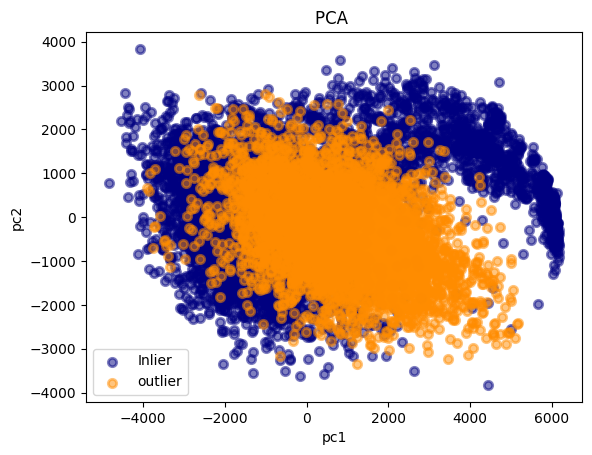

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import auxx
import importlib

importlib.reload(aux)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

auxx.plot_pca(X_pca, y)

plt.show()

#### Swapped PCA

multiclasses

explained variance ratio (first two components): [0.32281336 0.1015126 ]


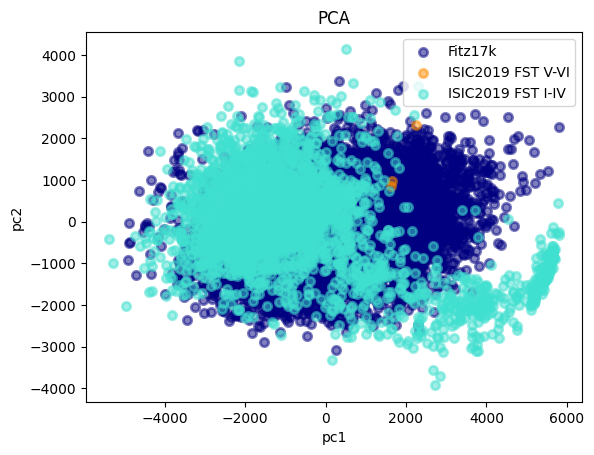

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import auxxx
import importlib

importlib.reload(aux)

pca = PCA(n_components=2)
X_pca_S = pca.fit_transform(X_S)
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

auxxx.plot_pca(X_pca_S, y_S)

plt.show()

two classes

explained variance ratio (first two components): [0.32281336 0.1015126 ]


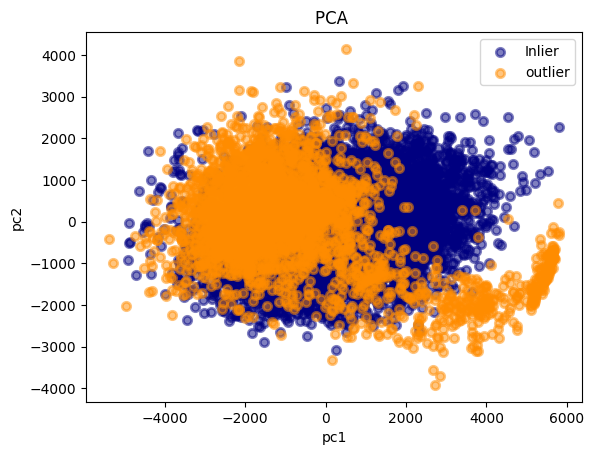

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import auxx
import importlib

importlib.reload(aux)

pca = PCA(n_components=2)
X_pca_S = pca.fit_transform(X_S)
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

auxx.plot_pca(X_pca_S, y_S)

plt.show()

# SVM model training

In [ ]:
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Grid search

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, stratify=y, random_state=42)

outliers_fraction = 0.15
onesvm = OneClassSVM(kernel="rbf")
gamma  = 0.00001

# Define the parameter grid for OneClassSVM
param_grid = {

   'nu': [0.01,0.05, 0.1, 0.2]}


#param_grid = {
 #   'nu': np.linspace(0.001, 0.99, 99),
 #   'gamma': np.logspace(-9, 3, 13)
#}

f1sc = make_scorer(f1_score, average='micro')

grid_estimator = GridSearchCV(onesvm, param_grid, scoring=f1sc, refit=True, cv=5, return_train_score=True, n_jobs=-1)
grid_estimator.fit(X_train, y_train)


best_params = grid_estimator.best_params_
best_f1_score = grid_estimator.best_score_
print("Best Parameters:", best_params)
print("Best F1 Score:", best_f1_score)



# Save the best parameters and best F1 score to a text file
with open('onesvm_grid_search_results.txt', 'w') as file:
    file.write(f"Best Parameters: {best_params}\n")
    file.write(f"Best F1 Score: {best_f1_score}\n")


Best Parameters: {'nu': 0.01}
Best F1 Score: 0.24548872180451128


In [ ]:
from sklearn.svm import OneClassSVM
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, stratify=y, random_state=42)

onesvm = OneClassSVM(kernel="rbf", gamma=0.00001,nu=0.01)
onesvm.fit(X_train)

OneClassSVM(gamma=1e-05, nu=0.01)

In [ ]:
import pickle
with open('One_SVM_model','wb') as f:
    pickle.dump(onesvm,f)